# Notebook to generate gaussian probes (same logic as single probes generation)
### Author : Lukas Delaye


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from astropy.io import fits
import howfsc

# Sinc probes path in corgihowfsc # \!/ CHANGE IT IF YOU WANT TO GENERATE OTHER GAUSSIANS PROBES \!/
modelpath = "C:/Users/ldelaye/Documents/Repos/corgihowfsc/corgihowfsc/model/probes"

probe0file = os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_cos.fits')
probe1file = os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_sinlr.fits')
probe2file = os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_sinud.fits')


In [21]:
def make_gaussian(shape, amp, sigma, cy, cx):
    """
    Generates a 2D Gaussian map.

    Args:
        shape: tuple (ny, nx)
        amp: Peak amplitude
        sigma: Standard deviation (width)
        cy, cx: Center coordinates (y, x)
    Returns:
        g: 2D Gaussian map
    """
    y, x = np.ogrid[:shape[0], :shape[1]]
    g = amp * np.exp(-((x - cx)**2 + (y - cy)**2) / (2 * sigma**2))
    return g

In [22]:
# 1. Load the reference Sinc probes
sin0probe = fits.getdata(probe0file)

# 2. Extract Probe Parameters from the reference
shape = sin0probe.shape
ref_amp = np.max(sin0probe) # Take the max value to see the center of gaussian
print(ref_amp)
# 3. Determine Centers

flat_idx0 = np.argmax(sin0probe)
flat_idx1 = flat_idx0 + 1
flat_idx2 = flat_idx0 + shape[0] + 1

# Convert flat indices to 2D coordinates (y, x) for the Gaussian function
cy0, cx0 = np.unravel_index(flat_idx0, shape)
cy1, cx1 = np.unravel_index(flat_idx1, shape)
cy2, cx2 = np.unravel_index(flat_idx2, shape)


2.119601152895609


In [23]:
# Configuration for Gaussians
sigma_val = 1.5  # Width of the gaussian in pixels (can be changed)

probes_config = {
    'act0': (cy0, cx0),
    'act1': (cy1, cx1),
    'act2': (cy2, cx2)
}

gaussian_probes = {}

# Generation loop
for name, (cy, cx) in probes_config.items():
    # Generate gaussian with the reference amplitude and calculated center for each actuator (3 times)
    g_map = make_gaussian(shape, ref_amp, sigma_val, cy, cx)
    gaussian_probes[name] = g_map

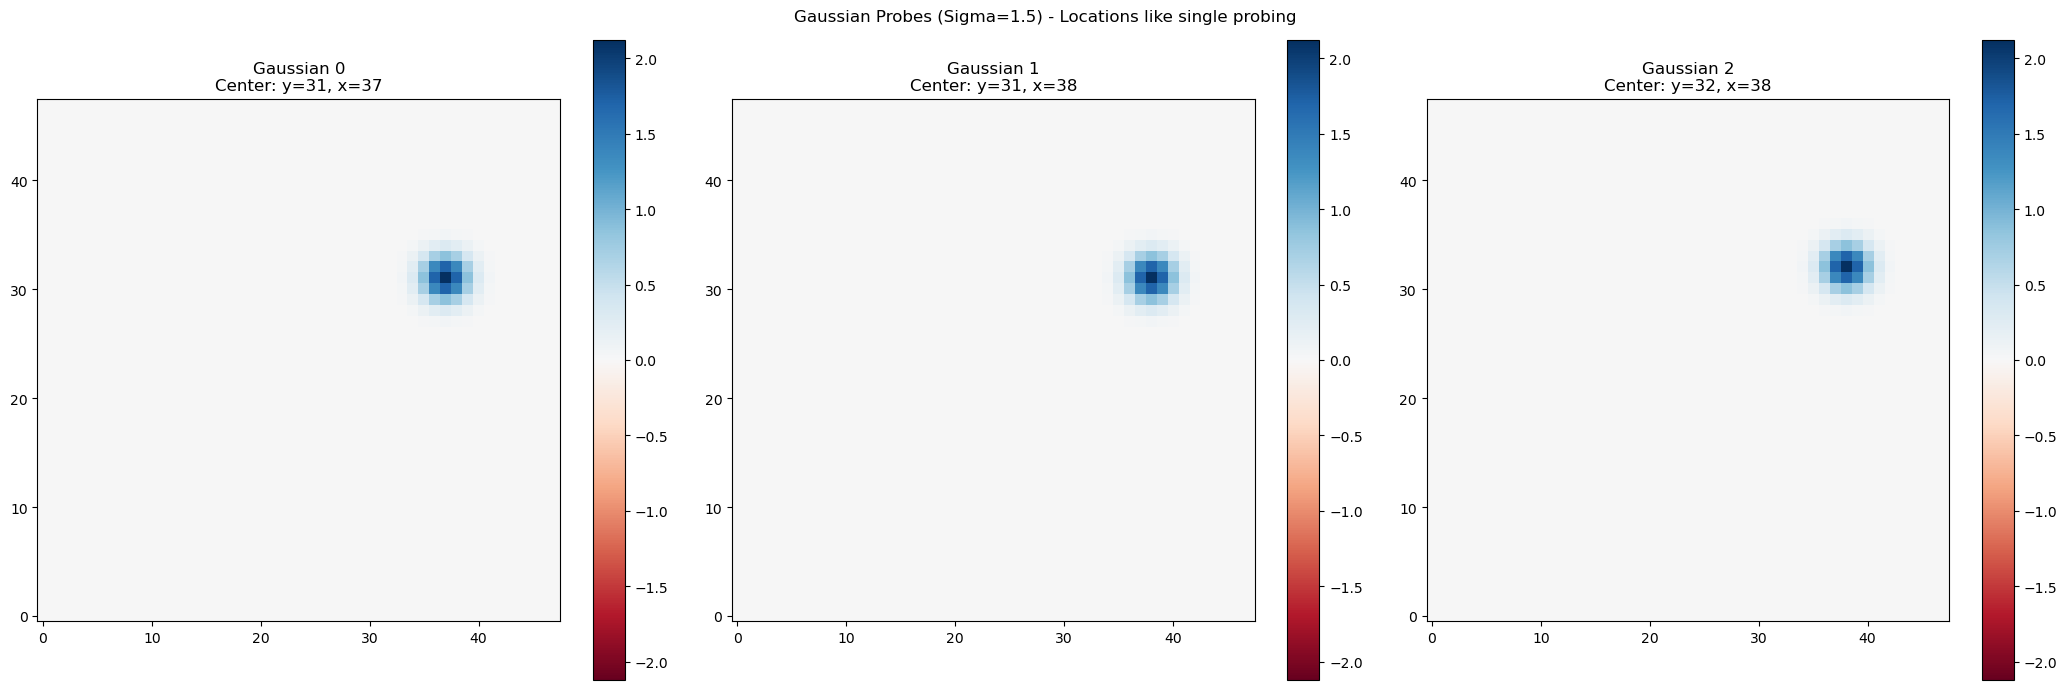

In [24]:
# Setup normalization for comparison (centered on 0)
zeronorm = TwoSlopeNorm(vcenter=0, vmin=-ref_amp, vmax=ref_amp)

plt.figure(figsize=(21, 7))
plt.suptitle(f'Gaussian Probes (Sigma={sigma_val}) - Locations like single probing')

# Plot Probe 0
plt.subplot(1, 3, 1)
plt.imshow(gaussian_probes['act0'], cmap='RdBu', origin='lower', norm=zeronorm)
plt.title(f"Gaussian 0\nCenter: y={cy0}, x={cx0}")
plt.colorbar()

# Plot Probe 1
plt.subplot(1, 3, 2)
plt.imshow(gaussian_probes['act1'], cmap='RdBu', origin='lower', norm=zeronorm)
plt.title(f"Gaussian 1\nCenter: y={cy1}, x={cx1}")
plt.colorbar()

# Plot Probe 2
plt.subplot(1, 3, 3)
plt.imshow(gaussian_probes['act2'], cmap='RdBu', origin='lower', norm=zeronorm)
plt.title(f"Gaussian 2\nCenter: y={cy2}, x={cx2}")
plt.colorbar()


plt.tight_layout()
plt.show()

In [25]:
fits.writeto('nfov_dm_dmrel_4_1.0e-05_gaussian0.fits', gaussian_probes['act0'], overwrite=True)
fits.writeto('nfov_dm_dmrel_4_1.0e-05_gaussian1.fits', gaussian_probes['act1'], overwrite=True)
fits.writeto('nfov_dm_dmrel_4_1.0e-05_gaussian2.fits', gaussian_probes['act2'], overwrite=True)